# Heart Disease EDA

### Data Features:
1. age: age in years

2. sex: sex (1 = male; 0 = female)

3. cp: chest pain type

        -- Value 1: typical angina

        -- Value 2: atypical angina

        -- Value 3: non-anginal pain
        
        -- Value 4: asymptomatic
    
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5. chol: serum cholestoral in mg/dl

6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

7. restecg: resting electrocardiographic results

        -- Value 0: normal

        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
                    
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria

8. thalach: maximum heart rate achieved

9. exang: exercise induced angina (1 = yes; 0 = no)

10. oldpeak = ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment

        -- Value 1: upsloping

        -- Value 2: flat
        
        -- Value 3: downsloping

12. ca: number of major vessels (0-3) colored by flourosopy

13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

### Target Column
14. num: diagnosis of heart disease (angiographic disease status)

        -- Value 0: < 50% diameter narrowing
        
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

### Data Loading 

In [55]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

In [73]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','Target']

In [74]:
df = pd.read_csv(url,names=columns)

In [75]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [82]:
#Shows the shape of the dataset and also the length of df
df.shape

(303, 14)

In [77]:
#Checking for count unique values in all the columns 
for i in df.columns:
    print(i,':',df[i].nunique())

age : 41
sex : 2
cp : 4
trestbps : 50
chol : 152
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 40
slope : 3
ca : 5
thal : 4
Target : 5


In [45]:
hd = heart_disease.variables
hd

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [78]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
Target        int64
dtype: object

### Data Cleaning and Pre-processing

In [80]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
Target      0
dtype: int64

In [93]:
#On scanning the dataset thoroughly, we found that some columns have '?' as values, so here we have found the count of those rows.
n = df.isin(['?']).any(axis=1)
n.value_counts()

False    297
True       6
Name: count, dtype: int64

In [103]:
#Dropping the rows that have the unwanted value as the count of the inconsistent value is less than 10%
df = df[~n]

## Univariate Analysis

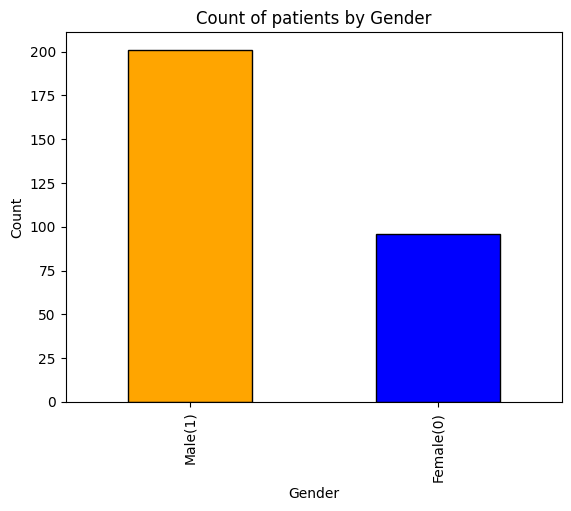

In [182]:
'''Gender Distribution in the dataset''' 

bar = df['sex'].value_counts().plot(kind='bar', color=['orange', 'blue'], edgecolor='black')

# Set the x-tick labels to 'Male' and 'Female'
bar.set_xticklabels(['Male(1)', 'Female(0)'])

# Set the labels for axes
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Count of patients by Gender")

# Show the plot
plt.show()

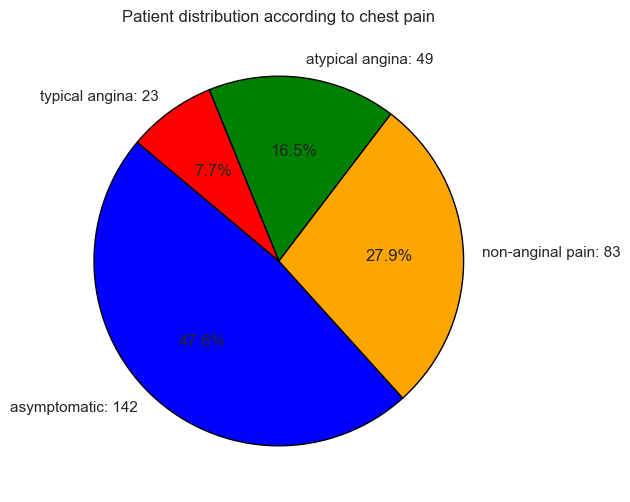

In [287]:
''' 
The major count of patients face asymptotic condition which means that they does not experience any chest pain. 
This category includes individuals who do not have symptoms despite having underlying heart conditions or those who are completely free of any cardiac issues.''' 

patient_counts = a.value_counts()
total_count = patient_counts.sum()
patient_percentages = (patient_counts / total_count) * 100
labels = [f'{label}: {count}' for label, count, percentage in zip(patient_counts.index, patient_counts, patient_percentages)]

plt.figure(figsize=(8, 6))
plt.pie(patient_counts, labels=labels, colors=['blue', 'orange','green','red'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Set the title
plt.title('Patient distribution according to chest pain')

# Show the plot
plt.show()


<Axes: >

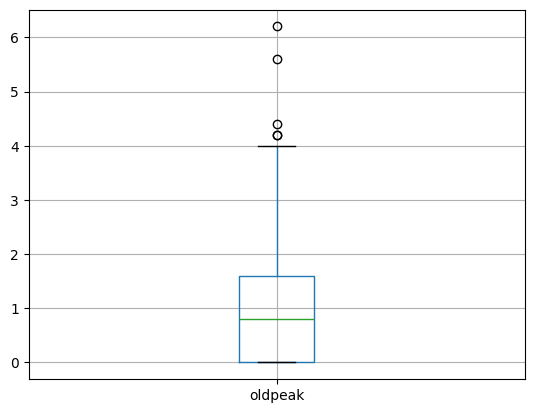

In [115]:
#Old peak refers to the ST depression induced by exercise relative to rest 
'''Elevation or depression of more than 0.05 mV (0.5 mm) is considered abnormal'''

df[['oldpeak']].boxplot()

Text(0.5, 1.0, 'Resting blood pressure distribution')

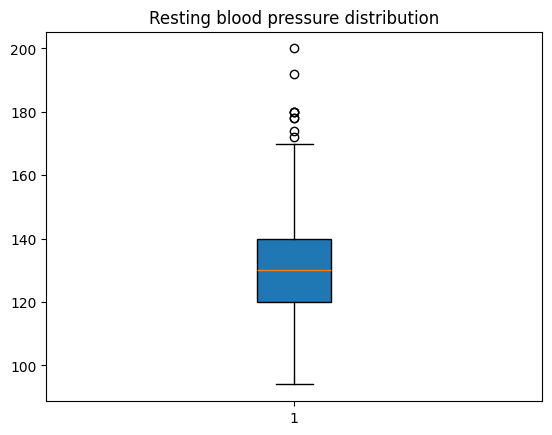

In [181]:
#The normal value of blood pressure a rest lies in the range of 120-140 according to our data
plt.boxplot(df['trestbps'],vert=True,patch_artist=True)
plt.title("Resting blood pressure distribution")

In [165]:
a = df['cp'].map({4: 'asymptomatic', 3: 'non-anginal pain',2:'atypical angina',1: 'typical angina'})

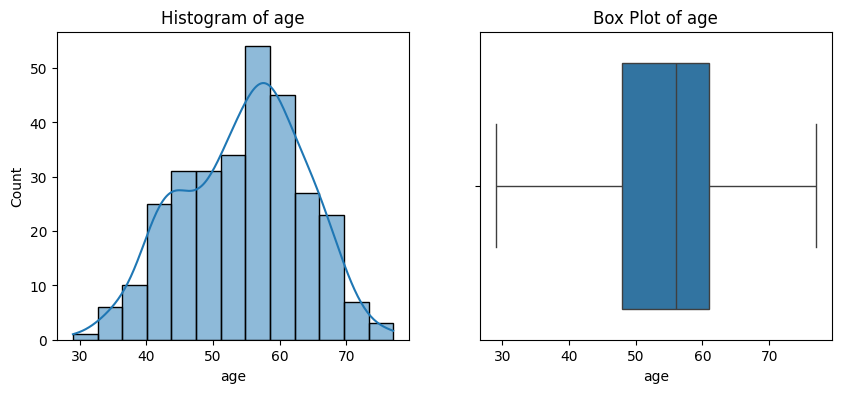

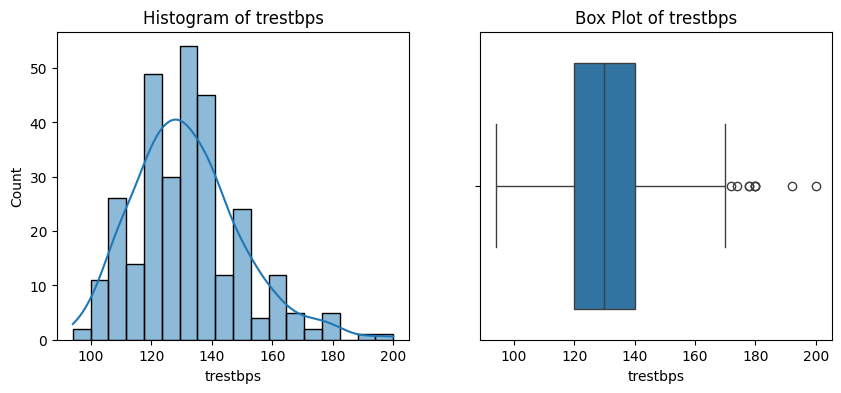

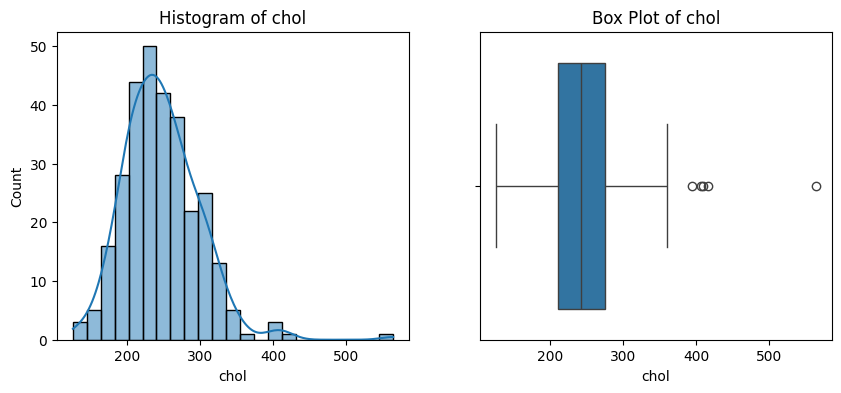

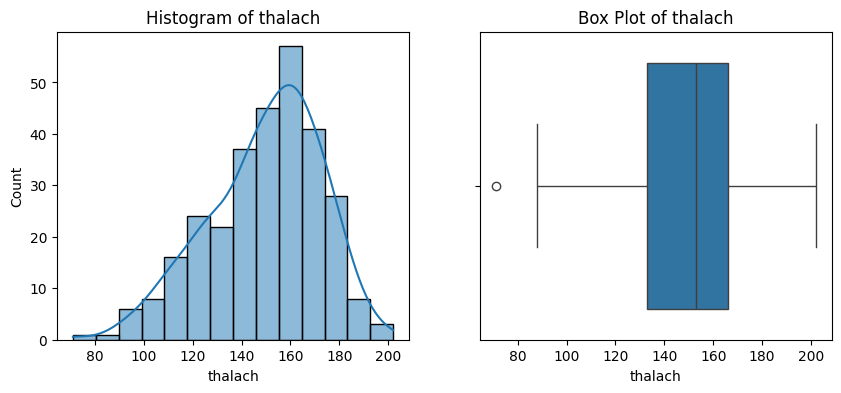

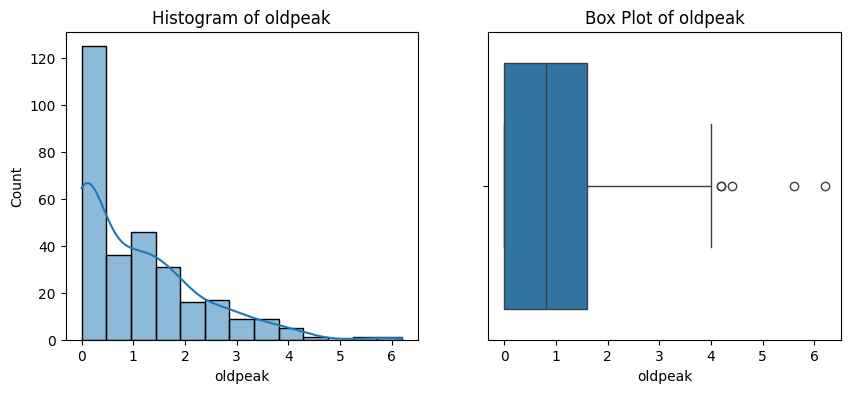

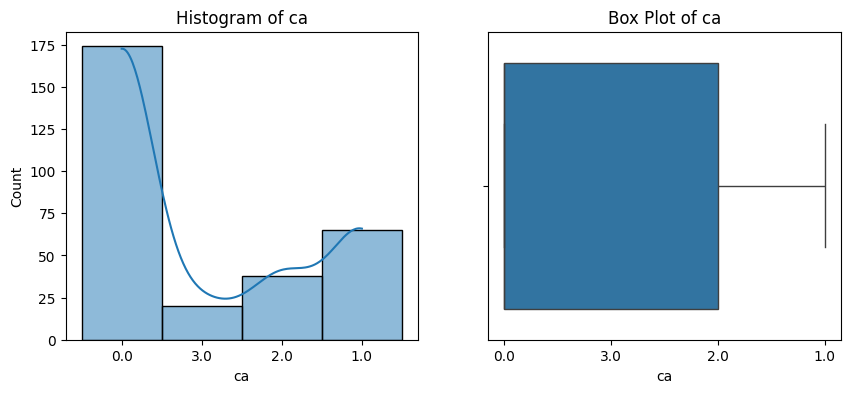

In [202]:
continuous_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

for var in continuous_var:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var}')
    
    plt.show()

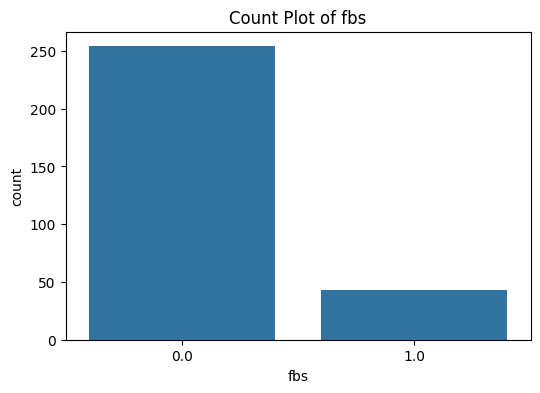

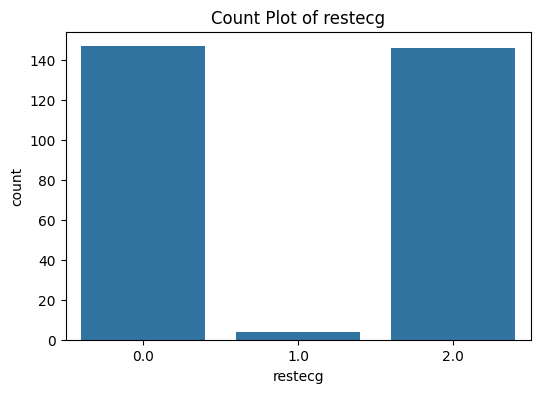

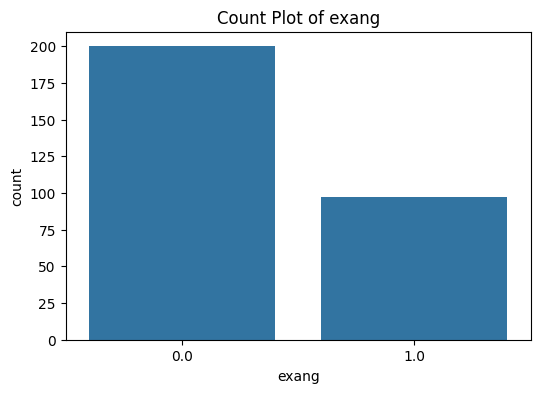

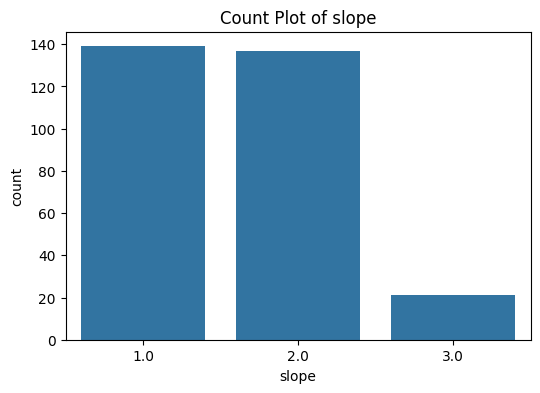

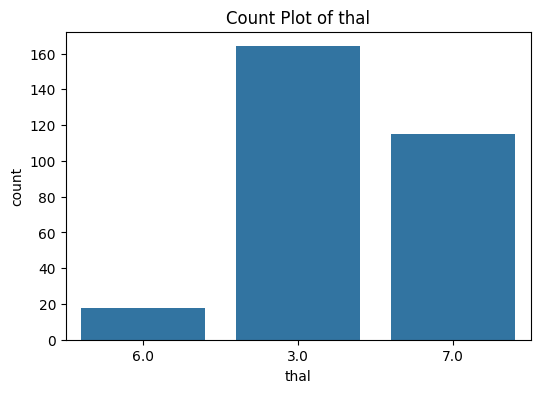

In [154]:
categorical_vars = ['fbs', 'restecg', 'exang', 'slope', 'thal']

for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[var])
    plt.title(f'Count Plot of {var}')
    plt.show()

In [231]:
#Maximum heartrate achieved 

max_heart_rate = df['chol'].max()
max_heart_rate_details = df[df['chol'] == max_heart_rate]
print(max_heart_rate_details)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
152  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   

     slope   ca thal  Target  
152    2.0  0.0  7.0       0  


So we can infer that the person with the maximum cholrestrol i.e. 564 is a female(as denoted 0) with less than 50% chances of getting an angiographic disease. 

In [249]:
min_heart_rate =df['thalach'].min()
min_hr_details = df[df['thalach']== min_heart_rate]
print(min_hr_details)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
245  67.0  1.0  4.0     120.0  237.0  0.0      0.0     71.0    0.0      1.0   

     slope   ca thal  Target  
245    2.0  0.0  3.0       1  


From this we get that the minimum heart rate is 71.0 which is below the normal range(78-132 for 65years above acc. to Forbes) occured in 67 year old man(denoted as 1) who holds a more than 50% chance of getting a heart disease.

## Bivariate analysis

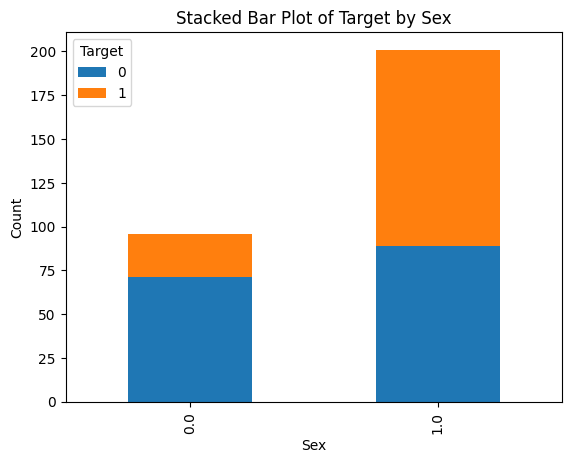

In [197]:
pd.crosstab(df['sex'], df['Target']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Target by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

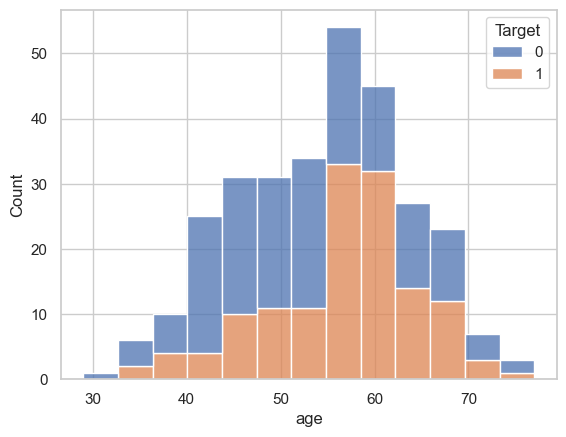

In [288]:
sns.histplot(df,x='age',hue='Target',multiple='stack')

<Axes: xlabel='sex', ylabel='Count'>

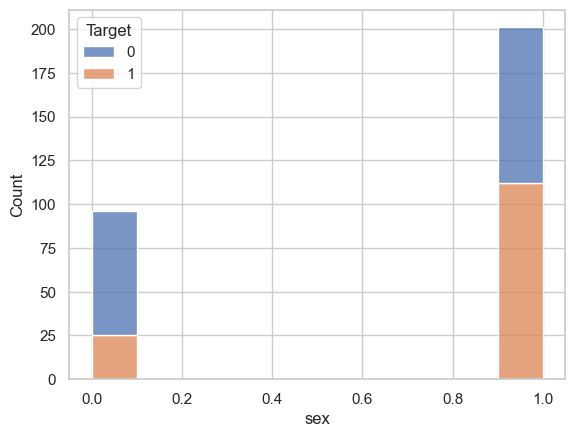

In [263]:
sns.histplot(df,x='sex',hue='Target',multiple='stack')

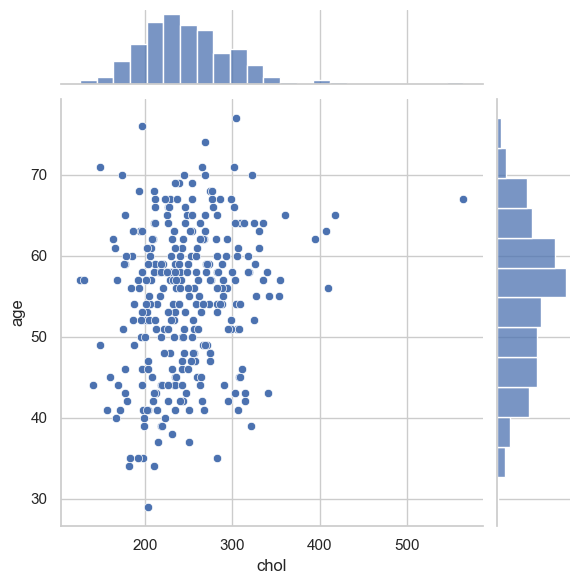

In [290]:
sns.jointplot(x='chol',y='age',data=df,kind='scatter')

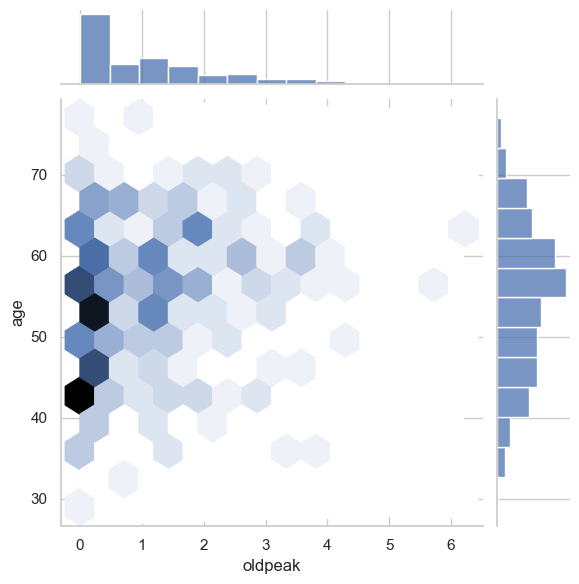

In [297]:
sns.jointplot(x='oldpeak',y='age',data=df,kind='hex')

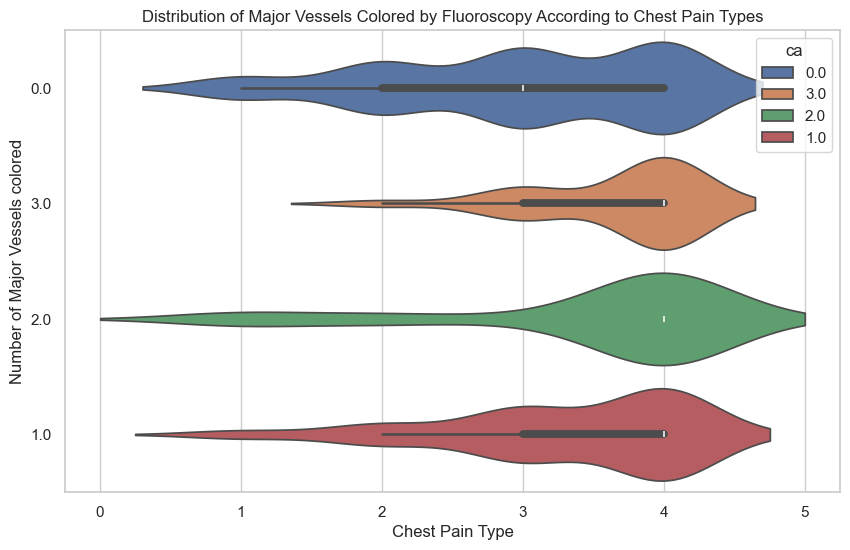

In [256]:
sns.set(style="whitegrid")

# Create a violin plot to show the distribution of ca values according to chest pain types
plt.figure(figsize=(10, 6))
sns.violinplot(x='cp', y='ca', data=df[['cp','ca']],hue='ca',legend=True)

# Customize the plot
plt.title('Distribution of Major Vessels Colored by Fluoroscopy According to Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Major Vessels colored')

# Show the plot
plt.show()

### Inferences:

1. Typical Angina (cp = 1):

The distribution of ca values for typical angina (cp = 1) is primarily around 0.
There is a high density of individuals with ca value 0.

2. Atypical Angina (cp = 2):

The distribution shows more variation compared to typical angina.
The densities are more spread out across different ca values, indicating no clear concentration around a single ca value.

3. Non-Anginal Pain (cp = 3):

Similar to atypical angina, there is a wide spread of ca values.
There are notable densities around ca values 0 and 2.

4. Asymptomatic (cp = 4):

The distribution for asymptomatic chest pain is quite spread out with densities around ca values 1 and 3.
This indicates that asymptomatic individuals can have a variety of ca values.

### Overall Observations:

1. Distribution Spread: The chest pain types 2 (atypical angina) and 3 (non-anginal pain) exhibit a wider spread of ca values, indicating variability in the number of major vessels colored by fluoroscopy among these patients.

2. Density Concentrations: For chest pain types 1 (typical angina) and 4 (asymptomatic), the densities are more concentrated around specific ca values (0 for typical angina and 1 & 3 for asymptomatic), suggesting less variability.

3. Asymptomatic Cases: The asymptomatic group shows a notable presence of ca values 1 and 3, which may indicate a different underlying pattern compared to symptomatic groups.

In [257]:
#Maximum heartrate and serum cholestrol level achieved in male and female 

df[['thalach','chol',]].groupby(df['sex']).max()

,thalach,chol
sex,,
0.0,192.0,564.0
1.0,202.0,353.0


In [258]:
#Count of males(1) and females(0) that face a exang (exercise inducded angina(true=1,false=0))

exang_counts_by_gender = df.groupby(['sex', 'exang']).size().unstack()
print(exang_counts_by_gender)

exang  0.0  1.0
sex            
0.0     74   22
1.0    126   75


## Multivariate Analysis

### Correlation Matrix

In [147]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


### Heatmap

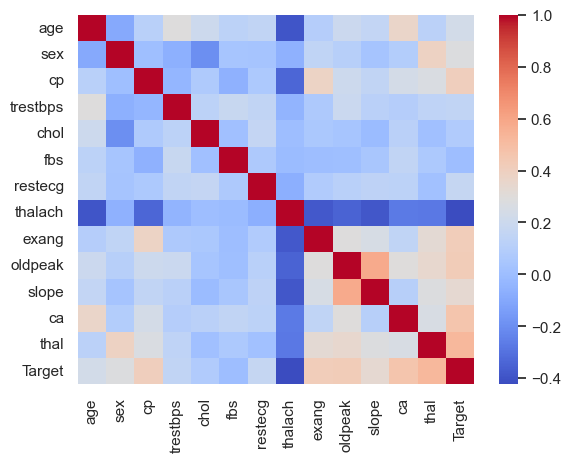

In [274]:
plt.figure(figure=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

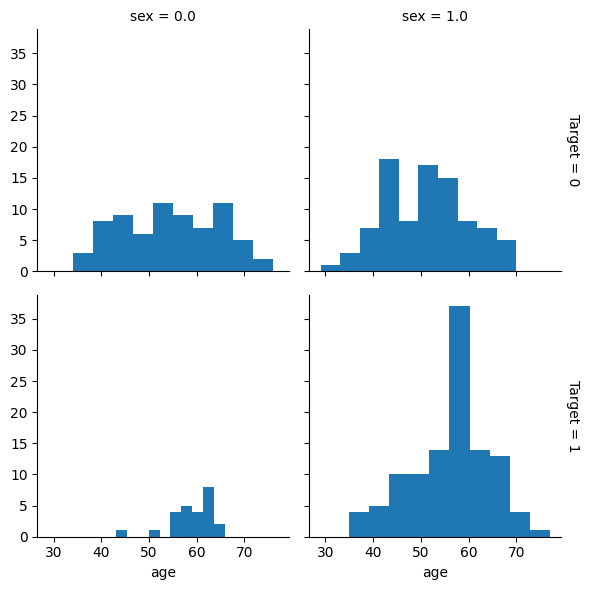

In [157]:
sns.FacetGrid(df, col='sex', row='Target', margin_titles=True).map(plt.hist,'age')
plt.show()

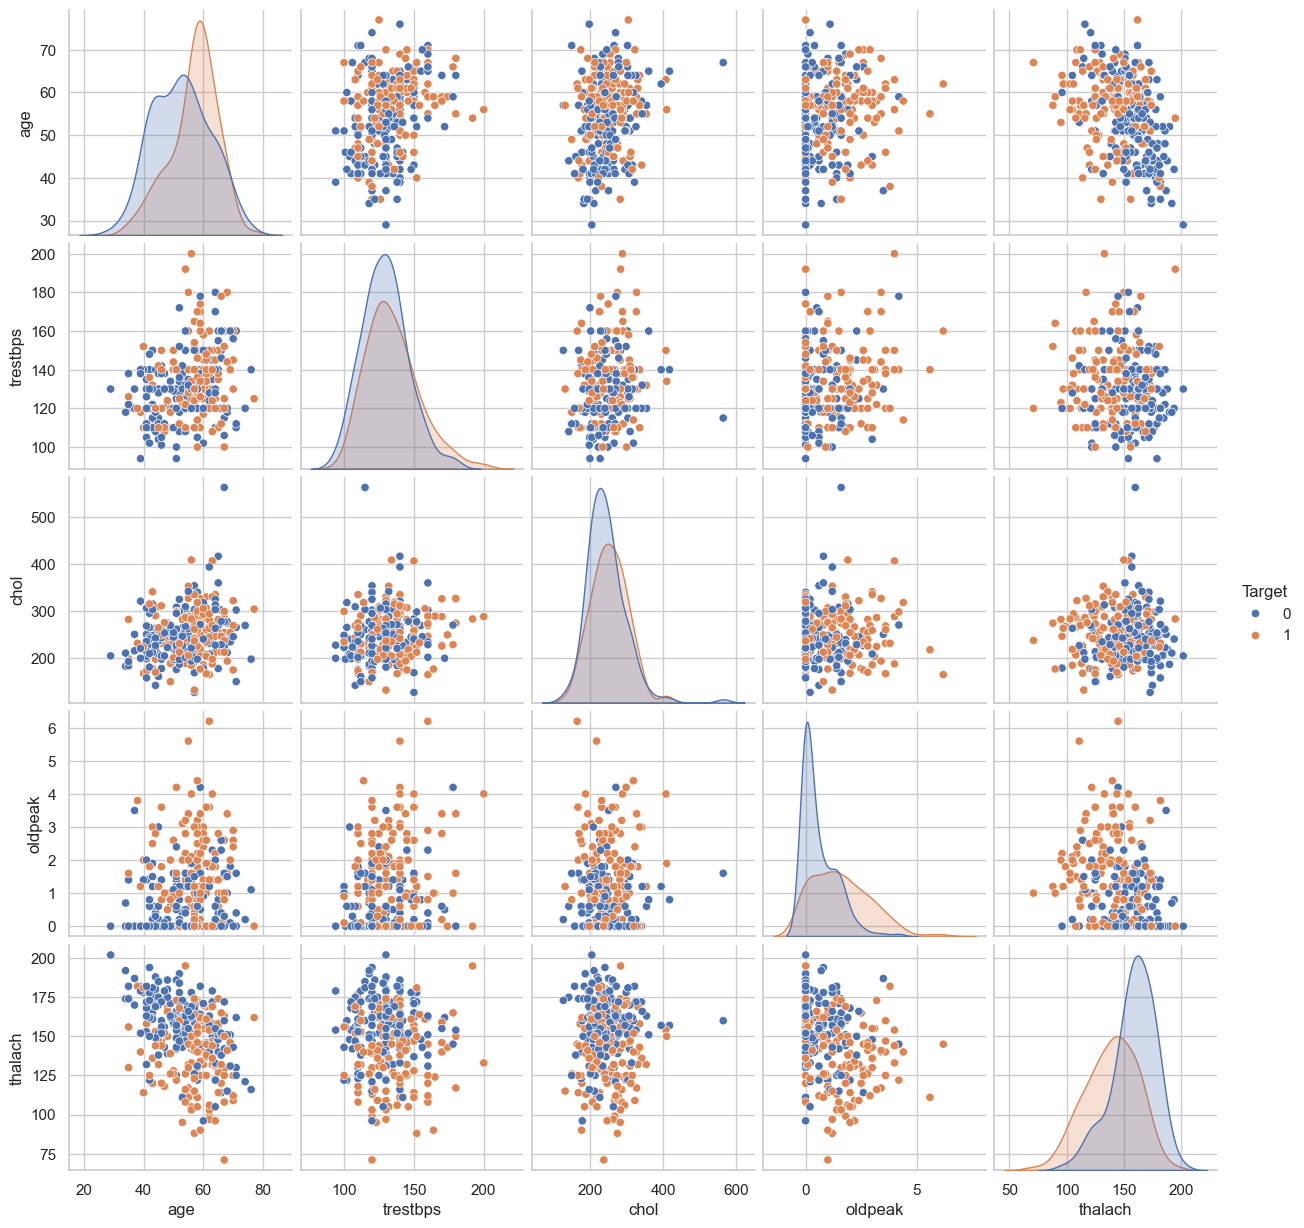

In [268]:
sns.pairplot(df,hue='Target',vars=['age','trestbps','chol','oldpeak','thalach','ca'])
# sns.pairplot(data, hue='target', vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
# plt.suptitle('Pairplot of Selected Features by Heart Disease Presence', y=1.02)
plt.show()

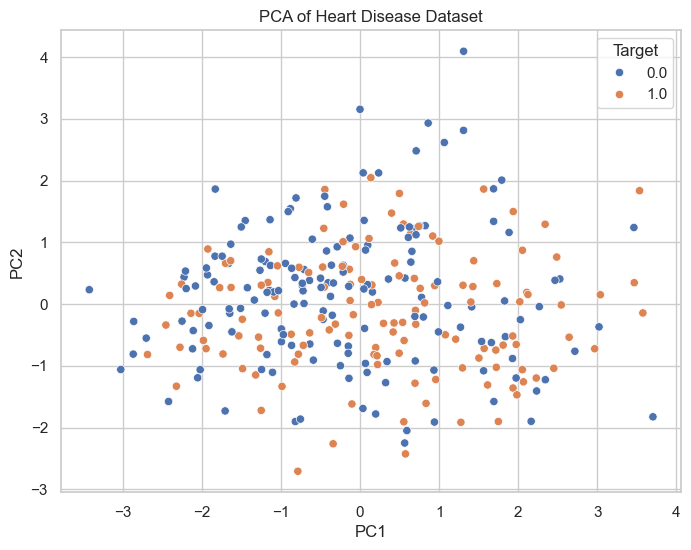

In [272]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

features = df[continuous_vars]
features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, df['Target']], axis=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=final_df)
plt.title('PCA of Heart Disease Dataset')
plt.show()
